In [3]:
# 상관분석 : 연속형인 두 변수 간에 어떤 선형적인 또는 비선형적 관계를 가지고 있는지 분석하는 것
import pandas as pd

w = pd.read_csv('ch5-1.csv')

w_n = w.iloc[:, 1:5]

w_corr = w_n.corr(method='pearson') 
# 상관게수의 종류 : 피어슨, 스피어만, 켄달 

,weight,egg_weight,movement,food
weight,1.000000,0.957169,0.380719,0.877574
egg_weight,0.957169,1.000000,0.428246,0.808147
movement,0.380719,0.428246,1.000000,0.319011
food,0.877574,0.808147,0.319011,1.000000


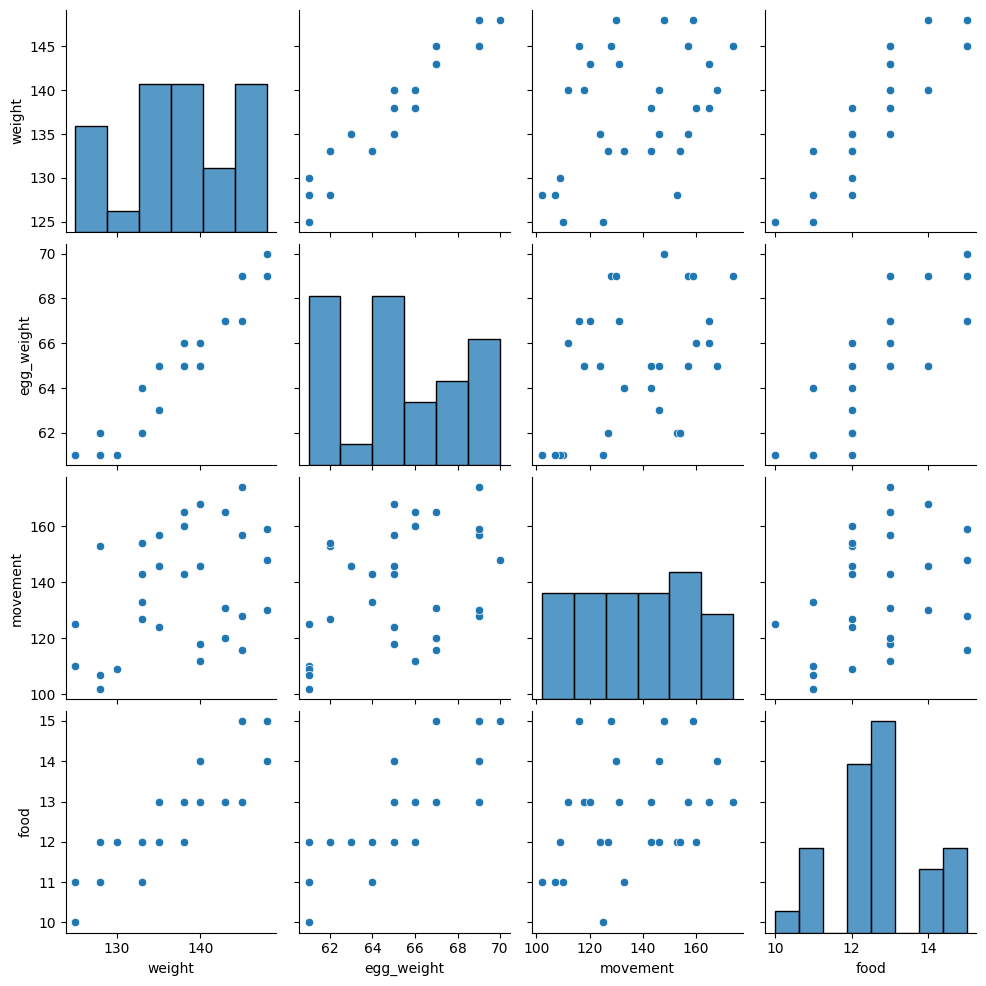

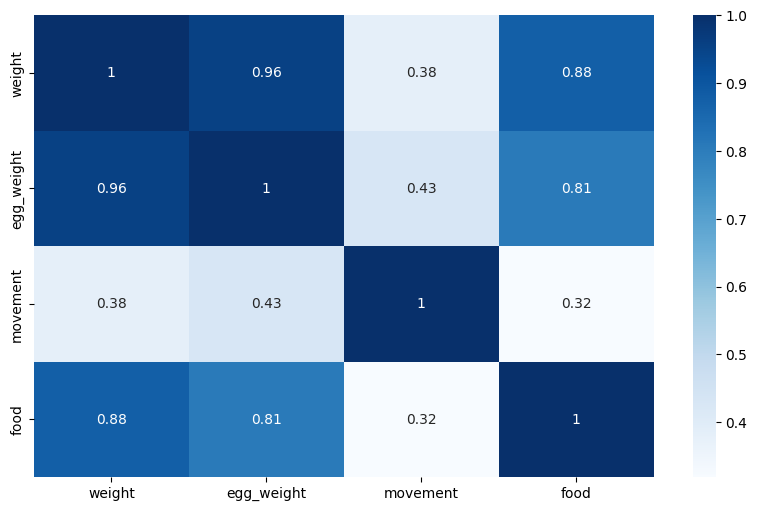

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(w_n)

plt.figure(figsize = (10, 6))
sns.heatmap(w_corr, annot = True, cmap = 'Blues') #annot 상관계수 표시, cmap 색깔 표시
plt.show()

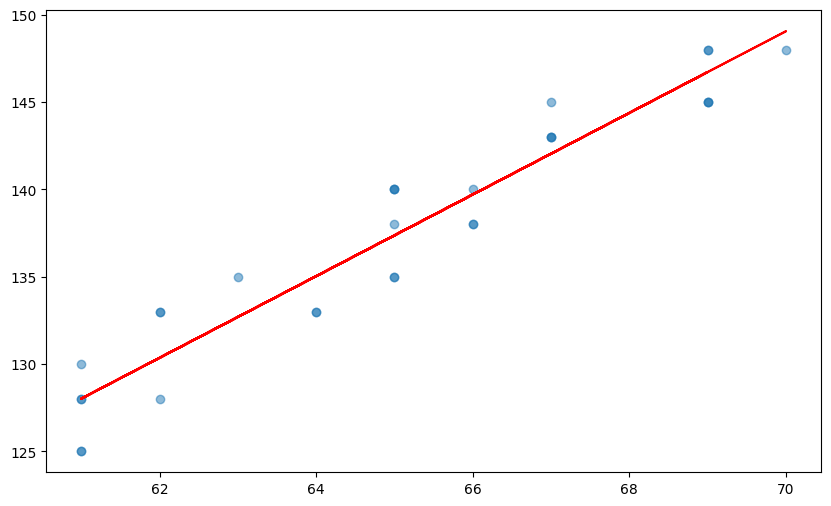

In [10]:
# 회귀분석 : 연속형 변수들에 대해 두 변수 간의 관계를 수식으로 나타내는 분석방법

## 단순 선형 회귀분석
import statsmodels.formula.api as smf

model_lm = smf.ols(formula='weight ~ egg_weight', data=w_n)
result_lm = model_lm.fit()
result_lm.summary()

plt.figure(figsize=(10, 6))
plt.scatter(w.egg_weight, w.weight, alpha=.5)
plt.plot(w.egg_weight, w.egg_weight*2.3371 - 14.5464, color='red')

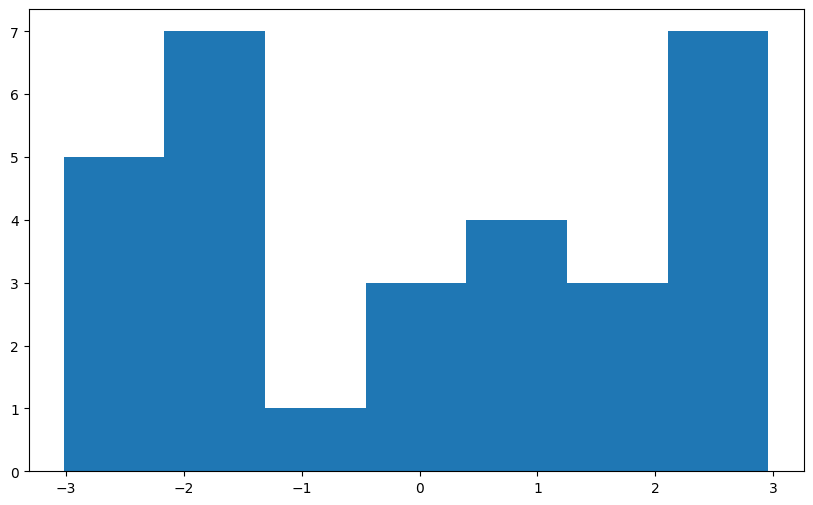

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(result_lm.resid, bins=7) # 잔차
plt.show()

In [18]:
model_mlm = smf.ols(formula='weight ~ egg_weight + food + movement', data=w_n)
result_mlm = model_mlm.fit()
result_mlm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     157.7
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           8.46e-17
Time:                        16:16:19   Log-Likelihood:                -56.008
No. Observations:                  30   AIC:                             120.0
Df Residuals:                      26   BIC:                             125.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9748      8.587      0.346      0.732     -14.676      20.626
egg_weight     1.7763      0.195      9.117      0.000       1.376       2.177
food           1.5847      0.405      3.915      0.001       0.753       2.417
movement      -0.0087      0.017     -0.522      0.606      -0.043       0.026
==============================================================================
Omnibus:                        1.993   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.369   Jarque-Bera (JB):                1.746
Skew:                          -0.480   Prob(JB):                        0.418
Kurtosis:                       2.311   Cond. No.                     4.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
model_mlm2 = smf.ols(formula='weight ~ egg_weight + food', data=w_n)
result_mlm2 = model_mlm2.fit()
result_mlm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     243.0
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           5.44e-18
Time:                        16:17:44   Log-Likelihood:                -56.164
No. Observations:                  30   AIC:                             118.3
Df Residuals:                      27   BIC:                             122.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6638      8.370      0.438      0.665     -13.510      20.837
egg_weight     1.7453      0.183      9.536      0.000       1.370       2.121
food           1.5955      0.399      4.001      0.000       0.777       2.414
==============================================================================
Omnibus:                        2.302   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.316   Jarque-Bera (JB):                1.940
Skew:                          -0.502   Prob(JB):                        0.379
Kurtosis:                       2.263   Cond. No.                     1.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# 다중공선성 : 분산팽창요인을 계산해 구할 수 있음
from statsmodels.stats.outliers_influence import variance_inflation_factor

model_mlm2.exog_names
vif1 = variance_inflation_factor(model_mlm2.exog, 1)

vif2 = variance_inflation_factor(model_mlm2.exog, 2)
vif1, vif2

(2.882684511307574, 2.882684511307574)

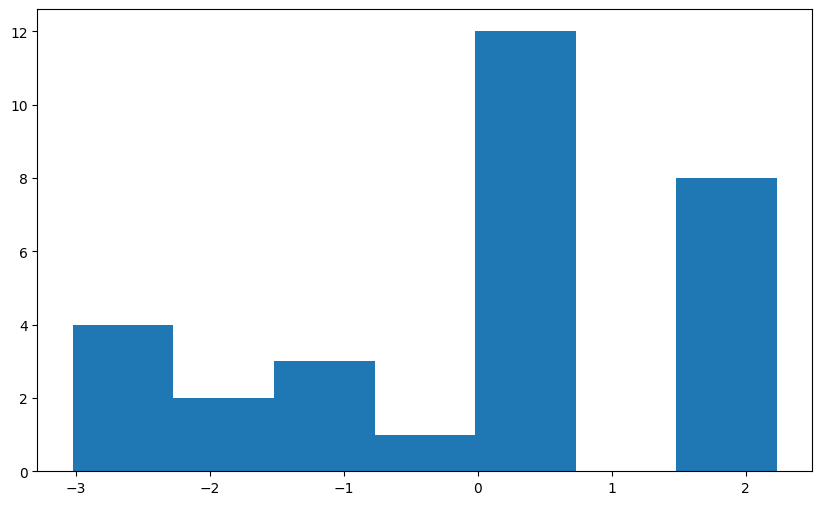

In [28]:
plt.figure(figsize= (10, 6))
plt.hist(result_mlm2.resid, bins=7)
plt.show()

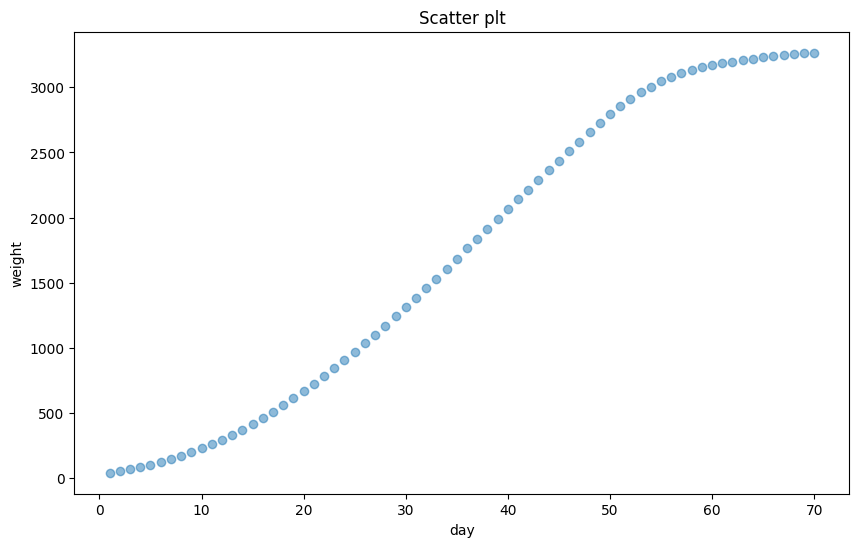

In [31]:
# 비선형 회귀분석

w2 = pd.read_csv('ch5-2.csv')
plt.figure(figsize=(10, 6))
plt.scatter(w2.day, w2.weight, alpha=.5)
plt.title('Scatter plt')
plt.xlabel('day')
plt.ylabel('weight')
plt.show()

In [ ]:
model_lm2 = smf.ols(formula = 'weight ~ day', data = w2)
result_lm2 = model_lm2.fit()
result_lm2.summary()

plt.figure(figsize=(10, 6))
